<a href="https://colab.research.google.com/github/JhanXXX/AI-in-Transport-TTGTM/blob/main/Group11_Coding_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week1: 2024-09-09 - 2024-09-15**
*   Observe and process our data
* Get more insights in claster & deep learning methods,
* Give a primary plan

Data preparation: load data
*  In the shared filepath, you may find three csv.s: for **evaluation** & **training** (2021-06-01 - 2021-12-31), and **final evaluation** (2022-01-01 - 2022-06-30).

## Data import

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#drive.mount('/content/drive')
Train_Path = {}
Eva_Path = {}
Final_Path = {}

In [ ]:
# fill in your own drive path

Train_Path["jh"] = "/content/drive/MyDrive/AH2179Group11/Data/training_dataset.csv"
Eva_Path["jh"] = "/content/drive/MyDrive/AH2179Group11/Data/evaluation_dataset.csv"
Final_Path["jh"] = "/content/drive/MyDrive/AH2179Group11/Data/final_evaluation_dataset.csv"

Train_Path["Qi"] = "training_dataset.csv"
Eva_Path["Qi"] = "evaluation_dataset.csv"
Final_Path["Qi"] = "final_evaluation_dataset.csv"

Train_Path["Noah"] = ""
Eva_Path["Noah"] = ""
Final_Path["Noah"] = ""

In [ ]:
# NNNNNNNNNNBBBBBBBBBBBBB!!!!!  change here whoever you are
Runner = "Qi"

In [ ]:
ori_train_df = pd.read_csv(Train_Path[Runner],delimiter=';')
ori_eva_df = pd.read_csv(Eva_Path[Runner],delimiter=';')
ori_final_df = pd.read_csv(Final_Path[Runner],delimiter=';')

In [ ]:
dd = pd.read_csv(Train_Path[Runner],delimiter=';')

In [ ]:
dd

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1921962,353,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,17.45,11.0
1921963,543,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,18.09,11.0
1921964,153,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,23.53,7.0
1921965,351,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,18.49,9.0


## Sum the flow

In [ ]:
def aggregate_flow(df):
    """
    Sums the FLOW for the same Date and Interval_1 under the same PORTAL,
    and removes the DP_ID and SPEED_MS_AVG columns.

    Parameters:
    df (pd.DataFrame): The original DataFrame containing DP_ID, PORTAL, Date, Interval_1, etc.

    Returns:
    pd.DataFrame: The processed DataFrame.
    """
    # Group by Date, Interval_1, and PORTAL, and sum the FLOW values
    df_agg = df.groupby(['Date', 'Interval_1', 'PORTAL'], as_index=False).agg({
        'FLOW': 'sum',
        'Interval_5': 'first',
        'Interval_15': 'first',
        'Interval_30': 'first',
        'Interval_60': 'first',
        'Time': 'first'
    })

    # Drop the DP_ID and SPEED_MS_AVG columns
    df_agg = df_agg.drop(columns=['DP_ID', 'SPEED_MS_AVG'], errors='ignore')

    return df_agg


In [ ]:
ori_train_df = aggregate_flow(ori_train_df)
ori_eva_df = aggregate_flow(ori_eva_df)
ori_final_df = aggregate_flow(ori_final_df)

In [ ]:
ori_train_df

,Date,Interval_1,PORTAL,FLOW,Interval_5,Interval_15,Interval_30,Interval_60,Time
0,20210601,240,"E4S 55,620",29.0,48,16,8,4,04:00:00
1,20210601,240,"E4S 56,160",28.0,48,16,8,4,04:00:00
2,20210601,240,"E4S 56,490",24.0,48,16,8,4,04:00:00
3,20210601,240,"E4S 56,780",27.0,48,16,8,4,04:00:00
4,20210601,240,"E4S 57,055",27.0,48,16,8,4,04:00:00
...,...,...,...,...,...,...,...,...,...
604023,20211231,600,"E4S 56,780",40.0,120,40,20,10,10:00:00
604024,20211231,600,"E4S 57,055",42.0,120,40,20,10,10:00:00
604025,20211231,600,"E4S 57,435",25.0,120,40,20,10,10:00:00
604026,20211231,600,"E4S 57,820",20.0,120,40,20,10,10:00:00


## Data processing
**Week 2: 2024-09-16 - 2024-09-22**




We just need the data in specific time period : 7:30 to 8:30. For training convinience, we can use 7:00 to 9:00.
Check the missing value of FLOW, we only have 8 missing values, but due to their speeds are not 0, so the flow is impossible to be 0, so I think we should just delete those null values
For each PORTAL, we have several lanes, and the Flow we need is the sum of each lane's flow on the same PORTAL.



In [ ]:
def preprocess_data(train_df):
    numberofData = 20
    # Filter rows where Interval_1 is between 420(7:00) and 540(9:00)
    train_df = train_df[(train_df["Interval_1"] >= 430) & (train_df["Interval_1"] <= 525)] #7:10 to 8:45 now, but after processing, only 7:30 to 8:45 remains(since prev 20 mins will be checked)

    # Convert 'Date' column to datetime with specific format
    train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y%m%d')

    # Add a new column for the day of the week (0=Monday, 6=Sunday)
    train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek

    # Create a group for each 'PORTAL' and sort by Date and Interval_1
    train_df.sort_values(by=["PORTAL", "Date", "Interval_1"], inplace=True)

    # Convert 'Date' column back to original format (YYYYMMDD)
    train_df['Date'] = train_df['Date'].dt.strftime('%Y%m%d')

    # Extract unique portals
    PORTALS = train_df["PORTAL"].unique()

    # Extract unique dates
    days = np.unique(train_df['Date'].values)

    # Calculate the total number of unique days
    ndays = len(days)

    # Define the total number of 1-minute intervals in a day
    nintvals = 96

    # Create a dictionary to hold the datasets for each portal
    # The shape is [ndays, nintvals, 20 + 1] to hold the previous 20 minutes of data + DayOfWeek feature
    vectorized_day_dataset = {portal: np.full((ndays, nintvals, numberofData + 2), np.nan) for portal in PORTALS}

    # Create a dictionary to hold datasets without NaNs
    vectorized_day_dataset_no_nans = {}

    # Process data for each portal
    for portal in PORTALS:
        portal_data = train_df[train_df['PORTAL'] == portal]
        day_subsets_df = portal_data.groupby(["Date"])

        for i, day in enumerate(days):
            if day in day_subsets_df.groups:
                df_t = day_subsets_df.get_group(day)

                for j in range(len(df_t)):
                    interval_index = df_t.iloc[j]["Interval_1"]

                    # We need to get the previous 20 minutes (if they exist)
                    for k in range(numberofData):
                        if j - k > 0:
                            flow_value = df_t.iloc[j - k]["FLOW"]
                            vectorized_day_dataset[portal][i, interval_index - 430, k] = flow_value
                        else:
                            # Not enough history data, fill with NaN or other placeholder
                            vectorized_day_dataset[portal][i, interval_index - 430, k] = -1

                    # Add DayOfWeek feature in the last column
                    vectorized_day_dataset[portal][i, interval_index - 430, (numberofData)] = df_t.iloc[j]["DayOfWeek"]
                    vectorized_day_dataset[portal][i, interval_index - 430, (numberofData + 1)] = df_t.iloc[j]["Interval_1"]


        # Calculate the number of NaNs per day (rows)
        nans_per_day = np.sum(np.isnan(vectorized_day_dataset[portal]), axis=(1, 2))
        days_with_missing_values = np.size(np.where(nans_per_day > 0)[0])
        print(f'Number of days with missing values for portal {portal}: {days_with_missing_values}')

        # Create a dataset with no NaNs for the current portal
        dataset_no_nans = vectorized_day_dataset[portal][nans_per_day == 0, :, :]

        # Calculate the number of -1s per column
        minus_ones_per_column = np.sum(dataset_no_nans == -1, axis=(0, 2))

        # Discard columns that contain -1
        dataset_no_nans_final = dataset_no_nans[:, minus_ones_per_column == 0, :]

        # Store the final dataset
        vectorized_day_dataset_no_nans[portal] = dataset_no_nans_final

        print(f"Portal: {portal} (no NaNs and no -1s)\n{vectorized_day_dataset_no_nans[portal]}\n")

        if np.isnan(vectorized_day_dataset_no_nans[portal]).any():
            print(f"Warning: There are still NaNs in the dataset for portal {portal}.")

    return vectorized_day_dataset_no_nans


In [ ]:
def compute_mean_feature(train_df):
    # Create a new dictionary to hold the modified datasets
    new_train_df1 = {}

    for portal, data in train_df.items():
        # Check the shape of the current data

        # Calculate the mean of the first 20 features (axis 2)
        numberofDate = 20
        mean_values = np.nanmean(data[:, :, :numberofDate], axis=2)  # Shape: (281, 110)

        # Create a new array with shape (281, 110, 4)
        new_shape = (data.shape[0], data.shape[1], 1 + 2)
        modified_data = np.empty(new_shape)

        # Assign the mean to the first channel of the new dataset
        modified_data[:, :, 0] = mean_values

        # Copy the last 3 features into the new dataset
        modified_data[:, :, 1:] = data[:, :, 20:]

        # Store the modified data in the new dictionary
        new_train_df1[portal] = modified_data


    return new_train_df1

Preprocess for the original dataset, just need to replace the parameter inside

In [ ]:
train_df = preprocess_data(ori_train_df)

<ipython-input-27-f3d3d3c01776>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y%m%d')
<ipython-input-27-f3d3d3c01776>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek
<ipython-input-27-f3d3d3c01776>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Number of days with missing values for portal E4S 55,620: 12
Portal: E4S 55,620 (no NaNs and no -1s)
[[[ 49.  36.  43. ...  64.   1. 450.]
  [ 54.  49.  36. ...  64.   1. 451.]
  [ 48.  54.  49. ...  48.   1. 452.]
  ...
  [ 36.  44.  60. ...  61.   1. 523.]
  [ 61.  36.  44. ...  48.   1. 524.]
  [ 50.  61.  36. ...  56.   1. 525.]]

 [[ 50.  43.  45. ...  46.   2. 450.]
  [ 45.  50.  43. ...  48.   2. 451.]
  [ 50.  45.  50. ...  50.   2. 452.]
  ...
  [ 54.  64.  46. ...  52.   2. 523.]
  [ 57.  54.  64. ...  45.   2. 524.]
  [ 52.  57.  54. ...  48.   2. 525.]]

 [[ 38.  39.  52. ...  46.   3. 450.]
  [ 55.  38.  39. ...  49.   3. 451.]
  [ 54.  55.  38. ...  53.   3. 452.]
  ...
  [ 47.  51.  54. ...  50.   3. 523.]
  [ 49.  47.  51. ...  47.   3. 524.]
  [ 56.  49.  47. ...  68.   3. 525.]]

 ...

 [[ 38.  20.  29. ...  19.   2. 450.]
  [ 26.  38.  20. ...  28.   2. 451.]
  [ 44.  26.  38. ...  25.   2. 452.]
  ...
  [ 36.  58.  50. ...  50.   2. 523.]
  [ 32.  36.  58. ...  30. 

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,160: 13
Portal: E4S 56,160 (no NaNs and no -1s)
[[[ 50.  48.  41. ...  65.   1. 450.]
  [ 52.  50.  48. ...  65.   1. 451.]
  [ 43.  52.  50. ...  61.   1. 452.]
  ...
  [ 44.  55.  45. ...  62.   1. 523.]
  [ 64.  44.  55. ...  49.   1. 524.]
  [ 43.  64.  44. ...  63.   1. 525.]]

 [[ 49.  55.  52. ...  52.   2. 450.]
  [ 59.  49.  55. ...  50.   2. 451.]
  [ 62.  59.  49. ...  56.   2. 452.]
  ...
  [ 58.  64.  55. ...  41.   2. 523.]
  [ 58.  58.  64. ...  49.   2. 524.]
  [ 52.  58.  58. ...  54.   2. 525.]]

 [[ 45.  46.  36. ...  50.   3. 450.]
  [ 53.  45.  46. ...  53.   3. 451.]
  [ 54.  53.  45. ...  58.   3. 452.]
  ...
  [ 42.  41.  55. ...  45.   3. 523.]
  [ 44.  42.  41. ...  66.   3. 524.]
  [ 75.  44.  42. ...  64.   3. 525.]]

 ...

 [[ 32.  24.  23. ...  23.   2. 450.]
  [ 35.  32.  24. ...  28.   2. 451.]
  [ 43.  35.  32. ...  27.   2. 452.]
  ...
  [ 33.  51.  54. ...  41.   2. 523.]
  [ 46.  33.  51. ...  39. 

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,490: 4
Portal: E4S 56,490 (no NaNs and no -1s)
[[[ 59.  57.  50. ...  76.   1. 450.]
  [ 59.  59.  57. ...  64.   1. 451.]
  [ 40.  59.  59. ...  70.   1. 452.]
  ...
  [ 71.  65.  56. ...  56.   1. 523.]
  [ 64.  71.  65. ...  66.   1. 524.]
  [ 52.  64.  71. ...  79.   1. 525.]]

 [[ 58.  68.  55. ...  51.   2. 450.]
  [ 62.  58.  68. ...  42.   2. 451.]
  [ 72.  62.  58. ...  50.   2. 452.]
  ...
  [ 57.  71.  73. ...  50.   2. 523.]
  [ 69.  57.  71. ...  50.   2. 524.]
  [ 66.  69.  57. ...  64.   2. 525.]]

 [[ 61.  49.  41. ...  70.   3. 450.]
  [ 63.  61.  49. ...  57.   3. 451.]
  [ 58.  63.  61. ...  55.   3. 452.]
  ...
  [ 40.  54.  62. ...  57.   3. 523.]
  [ 60.  40.  54. ...  79.   3. 524.]
  [ 79.  60.  40. ...  70.   3. 525.]]

 ...

 [[ 26.  25.  16. ...  27.   2. 450.]
  [ 39.  26.  25. ...  34.   2. 451.]
  [ 47.  39.  26. ...  27.   2. 452.]
  ...
  [ 33.  45.  70. ...  41.   2. 523.]
  [ 43.  33.  45. ...  31.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,780: 10
Portal: E4S 56,780 (no NaNs and no -1s)
[[[ 60.  62.  56. ...  75.   1. 450.]
  [ 57.  60.  62. ...  70.   1. 451.]
  [ 47.  57.  60. ...  64.   1. 452.]
  ...
  [ 61.  45.  55. ...  57.   1. 523.]
  [ 61.  61.  45. ...  69.   1. 524.]
  [ 48.  61.  61. ...  72.   1. 525.]]

 [[ 53.  69.  56. ...  62.   2. 450.]
  [ 56.  53.  69. ...  64.   2. 451.]
  [ 59.  56.  53. ...  55.   2. 452.]
  ...
  [ 67.  63.  69. ...  49.   2. 523.]
  [ 68.  67.  63. ...  55.   2. 524.]
  [ 63.  68.  67. ...  63.   2. 525.]]

 [[ 59.  44.  59. ...  60.   3. 450.]
  [ 57.  59.  44. ...  50.   3. 451.]
  [ 62.  57.  59. ...  68.   3. 452.]
  ...
  [ 49.  50.  44. ...  57.   3. 523.]
  [ 71.  49.  50. ...  79.   3. 524.]
  [ 73.  71.  49. ...  72.   3. 525.]]

 ...

 [[ 25.  38.  25. ...  38.   2. 450.]
  [ 46.  25.  38. ...  21.   2. 451.]
  [ 39.  46.  25. ...  32.   2. 452.]
  ...
  [ 39.  35.  66. ...  33.   2. 523.]
  [ 43.  39.  35. ...  33. 

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,055: 14
Portal: E4S 57,055 (no NaNs and no -1s)
[[[ 62.  64.  47. ...  76.   1. 450.]
  [ 53.  62.  64. ...  65.   1. 451.]
  [ 48.  53.  62. ...  64.   1. 452.]
  ...
  [ 66.  49.  56. ...  50.   1. 523.]
  [ 54.  66.  49. ...  61.   1. 524.]
  [ 44.  54.  66. ...  80.   1. 525.]]

 [[ 57.  57.  66. ...  65.   2. 450.]
  [ 58.  57.  57. ...  48.   2. 451.]
  [ 55.  58.  57. ...  70.   2. 452.]
  ...
  [ 57.  64.  71. ...  57.   2. 523.]
  [ 62.  57.  64. ...  59.   2. 524.]
  [ 46.  62.  57. ...  56.   2. 525.]]

 [[ 62.  54.  51. ...  55.   3. 450.]
  [ 57.  62.  54. ...  49.   3. 451.]
  [ 49.  57.  62. ...  53.   3. 452.]
  ...
  [ 51.  48.  51. ...  69.   3. 523.]
  [ 70.  51.  48. ...  77.   3. 524.]
  [ 64.  70.  51. ...  64.   3. 525.]]

 ...

 [[ 32.  28.  24. ...  30.   2. 450.]
  [ 38.  32.  28. ...  29.   2. 451.]
  [ 38.  38.  32. ...  21.   2. 452.]
  ...
  [ 36.  37.  54. ...  36.   2. 523.]
  [ 35.  36.  37. ...  32. 

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,435: 3
Portal: E4S 57,435 (no NaNs and no -1s)
[[[ 73.  64.  67. ...  68.   1. 450.]
  [ 45.  73.  64. ...  67.   1. 451.]
  [ 85.  45.  73. ...  48.   1. 452.]
  ...
  [ 56.  60.  65. ...  74.   1. 523.]
  [ 69.  56.  60. ...  75.   1. 524.]
  [ 53.  69.  56. ...  51.   1. 525.]]

 [[ 80.  67.  74. ...  59.   2. 450.]
  [ 57.  80.  67. ...  57.   2. 451.]
  [ 66.  57.  80. ...  64.   2. 452.]
  ...
  [ 64.  77.  66. ...  73.   2. 523.]
  [ 74.  64.  77. ...  59.   2. 524.]
  [ 64.  74.  64. ...  67.   2. 525.]]

 [[ 92.  77.  61. ...  63.   3. 450.]
  [ 72.  92.  77. ...  50.   3. 451.]
  [ 49.  72.  92. ...  52.   3. 452.]
  ...
  [ 69.  62.  66. ...  79.   3. 523.]
  [ 73.  69.  62. ...  62.   3. 524.]
  [ 63.  73.  69. ...  77.   3. 525.]]

 ...

 [[ 15.  25.  30. ...  29.   2. 450.]
  [ 19.  15.  25. ...  23.   2. 451.]
  [ 35.  19.  15. ...  31.   2. 452.]
  ...
  [ 30.  49.  38. ...  33.   2. 523.]
  [ 27.  30.  49. ...  31.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,820: 3
Portal: E4S 57,820 (no NaNs and no -1s)
[[[ 60.  77.  65. ...  68.   1. 450.]
  [ 63.  60.  77. ...  57.   1. 451.]
  [ 79.  63.  60. ...  57.   1. 452.]
  ...
  [ 64.  61.  63. ...  63.   1. 523.]
  [ 56.  64.  61. ...  68.   1. 524.]
  [ 55.  56.  64. ...  73.   1. 525.]]

 [[ 74.  80.  56. ...  50.   2. 450.]
  [ 60.  74.  80. ...  63.   2. 451.]
  [ 66.  60.  74. ...  80.   2. 452.]
  ...
  [ 66.  69.  63. ...  70.   2. 523.]
  [ 76.  66.  69. ...  65.   2. 524.]
  [ 66.  76.  66. ...  67.   2. 525.]]

 [[ 84.  73.  78. ...  50.   3. 450.]
  [ 66.  84.  73. ...  57.   3. 451.]
  [ 57.  66.  84. ...  52.   3. 452.]
  ...
  [ 68.  68.  65. ...  78.   3. 523.]
  [ 71.  68.  68. ...  64.   3. 524.]
  [ 62.  71.  68. ...  75.   3. 525.]]

 ...

 [[ 21.  21.  29. ...  26.   2. 450.]
  [ 25.  21.  21. ...  28.   2. 451.]
  [ 34.  25.  21. ...  31.   2. 452.]
  ...
  [ 30.  47.  38. ...  38.   2. 523.]
  [ 22.  30.  47. ...  34.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 58,140: 2
Portal: E4S 58,140 (no NaNs and no -1s)
[[[ 54.  72.  70. ...  72.   1. 450.]
  [ 70.  54.  72. ...  46.   1. 451.]
  [ 77.  70.  54. ...  56.   1. 452.]
  ...
  [ 66.  57.  73. ...  72.   1. 523.]
  [ 53.  66.  57. ...  63.   1. 524.]
  [ 59.  53.  66. ...  72.   1. 525.]]

 [[ 65.  93.  56. ...  53.   2. 450.]
  [ 71.  65.  93. ...  59.   2. 451.]
  [ 61.  71.  65. ...  80.   2. 452.]
  ...
  [ 73.  67.  69. ...  72.   2. 523.]
  [ 72.  73.  67. ...  67.   2. 524.]
  [ 62.  72.  73. ...  67.   2. 525.]]

 [[ 83.  74.  78. ...  47.   3. 450.]
  [ 58.  83.  74. ...  61.   3. 451.]
  [ 61.  58.  83. ...  56.   3. 452.]
  ...
  [ 68.  76.  68. ...  67.   3. 523.]
  [ 67.  68.  76. ...  78.   3. 524.]
  [ 71.  67.  68. ...  64.   3. 525.]]

 ...

 [[ 18.  24.  22. ...  23.   2. 450.]
  [ 31.  18.  24. ...  25.   2. 451.]
  [ 29.  31.  18. ...  31.   2. 452.]
  ...
  [ 26.  40.  49. ...  39.   2. 523.]
  [ 29.  26.  40. ...  31.  

In [ ]:
train_df["E4S 58,140"].shape

(212, 76, 22)

In [ ]:
for key, value in train_df.items():
    print(f"{key}: {value.shape}")


E4S 55,620: (202, 76, 22)
E4S 56,160: (201, 76, 22)
E4S 56,490: (210, 76, 22)
E4S 56,780: (204, 76, 22)
E4S 57,055: (200, 76, 22)
E4S 57,435: (211, 76, 22)
E4S 57,820: (211, 76, 22)
E4S 58,140: (212, 76, 22)


In [ ]:
#use mean or not
train_df_mean = compute_mean_feature(train_df)
train_df["E4S 58,140"].shape

(212, 76, 22)

In [ ]:
eva_df = preprocess_data(ori_final_df)

<ipython-input-27-f3d3d3c01776>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y%m%d')
<ipython-input-27-f3d3d3c01776>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek
<ipython-input-27-f3d3d3c01776>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Number of days with missing values for portal E4S 55,620: 8
Portal: E4S 55,620 (no NaNs and no -1s)
[[[ 41.  37.  43. ...  38.   2. 450.]
  [ 34.  41.  37. ...  35.   2. 451.]
  [ 39.  34.  41. ...  38.   2. 452.]
  ...
  [ 47.  54.  51. ...  46.   2. 523.]
  [ 43.  47.  54. ...  47.   2. 524.]
  [ 51.  43.  47. ...  42.   2. 525.]]

 [[ 11.  12.  23. ...  16.   3. 450.]
  [ 15.  11.  12. ...  17.   3. 451.]
  [ 19.  15.  11. ...  13.   3. 452.]
  ...
  [ 23.  32.  26. ...  18.   3. 523.]
  [ 39.  23.  32. ...  14.   3. 524.]
  [ 21.  39.  23. ...  24.   3. 525.]]

 [[ 14.  11.   9. ...   9.   5. 450.]
  [  6.  14.  11. ...  12.   5. 451.]
  [ 13.   6.  14. ...   7.   5. 452.]
  ...
  [ 41.  21.  14. ...  14.   5. 523.]
  [ 41.  41.  21. ...  11.   5. 524.]
  [ 27.  41.  41. ...  13.   5. 525.]]

 ...

 [[ 59.  60.  57. ...  49.   1. 450.]
  [ 47.  59.  60. ...  45.   1. 451.]
  [ 57.  47.  59. ...  37.   1. 452.]
  ...
  [ 59.  71.  47. ...  44.   1. 523.]
  [ 38.  59.  71. ...  54.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,160: 8
Portal: E4S 56,160 (no NaNs and no -1s)
[[[ 39.  39.  41. ...  44.   2. 450.]
  [ 38.  39.  39. ...  41.   2. 451.]
  [ 40.  38.  39. ...  35.   2. 452.]
  ...
  [ 53.  47.  44. ...  46.   2. 523.]
  [ 30.  53.  47. ...  52.   2. 524.]
  [ 51.  30.  53. ...  52.   2. 525.]]

 [[ 15.  10.  14. ...  21.   3. 450.]
  [ 15.  15.  10. ...  10.   3. 451.]
  [ 12.  15.  15. ...  16.   3. 452.]
  ...
  [ 34.  22.  36. ...  20.   3. 523.]
  [ 26.  34.  22. ...  13.   3. 524.]
  [ 27.  26.  34. ...  19.   3. 525.]]

 [[ 12.  10.  15. ...  10.   5. 450.]
  [ 10.  12.  10. ...   6.   5. 451.]
  [ 20.  10.  12. ...   9.   5. 452.]
  ...
  [ 42.  30.  10. ...  13.   5. 523.]
  [ 33.  42.  30. ...  13.   5. 524.]
  [ 41.  33.  42. ...  15.   5. 525.]]

 ...

 [[ 52.  68.  60. ...  42.   1. 450.]
  [ 62.  52.  68. ...  45.   1. 451.]
  [ 46.  62.  52. ...  71.   1. 452.]
  ...
  [ 63.  60.  46. ...  39.   1. 523.]
  [ 42.  63.  60. ...  56.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,490: 1
Portal: E4S 56,490 (no NaNs and no -1s)
[[[ 38.  40.  46. ...  51.   2. 450.]
  [ 45.  38.  40. ...  48.   2. 451.]
  [ 46.  45.  38. ...  44.   2. 452.]
  ...
  [ 49.  52.  55. ...  54.   2. 523.]
  [ 46.  49.  52. ...  47.   2. 524.]
  [ 54.  46.  49. ...  60.   2. 525.]]

 [[ 16.   9.  16. ...  17.   3. 450.]
  [ 16.  16.   9. ...  13.   3. 451.]
  [ 13.  16.  16. ...  14.   3. 452.]
  ...
  [ 39.  19.  37. ...  17.   3. 523.]
  [ 33.  39.  19. ...  20.   3. 524.]
  [ 21.  33.  39. ...  23.   3. 525.]]

 [[  4.  14.  15. ...  11.   5. 450.]
  [ 17.   4.  14. ...   6.   5. 451.]
  [ 16.  17.   4. ...   9.   5. 452.]
  ...
  [ 45.  38.  15. ...   9.   5. 523.]
  [ 28.  45.  38. ...  16.   5. 524.]
  [ 61.  28.  45. ...  18.   5. 525.]]

 ...

 [[ 56.  61.  56. ...  46.   1. 450.]
  [ 55.  56.  61. ...  37.   1. 451.]
  [ 41.  55.  56. ...  74.   1. 452.]
  ...
  [ 56.  56.  55. ...  44.   1. 523.]
  [ 40.  56.  56. ...  56.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 56,780: 3
Portal: E4S 56,780 (no NaNs and no -1s)
[[[ 32.  41.  47. ...  42.   2. 450.]
  [ 40.  32.  41. ...  43.   2. 451.]
  [ 45.  40.  32. ...  39.   2. 452.]
  ...
  [ 44.  42.  63. ...  56.   2. 523.]
  [ 67.  44.  42. ...  50.   2. 524.]
  [ 45.  67.  44. ...  48.   2. 525.]]

 [[ 20.   7.  12. ...  14.   3. 450.]
  [ 10.  20.   7. ...  15.   3. 451.]
  [ 15.  10.  20. ...  15.   3. 452.]
  ...
  [ 38.  26.  24. ...  12.   3. 523.]
  [ 22.  38.  26. ...  18.   3. 524.]
  [ 23.  22.  38. ...  22.   3. 525.]]

 [[  7.   8.  12. ...   8.   5. 450.]
  [  8.   7.   8. ...   6.   5. 451.]
  [ 17.   8.   7. ...   4.   5. 452.]
  ...
  [ 34.  37.  17. ...  11.   5. 523.]
  [ 25.  34.  37. ...  15.   5. 524.]
  [ 55.  25.  34. ...  16.   5. 525.]]

 ...

 [[ 56.  77.  63. ...  52.   1. 450.]
  [ 53.  56.  77. ...  45.   1. 451.]
  [ 53.  53.  56. ...  73.   1. 452.]
  ...
  [ 51.  65.  61. ...  58.   1. 523.]
  [ 51.  51.  65. ...  70.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,055: 6
Portal: E4S 57,055 (no NaNs and no -1s)
[[[ 34.  37.  41. ...  42.   2. 450.]
  [ 45.  34.  37. ...  38.   2. 451.]
  [ 45.  45.  34. ...  34.   2. 452.]
  ...
  [ 39.  50.  56. ...  54.   2. 523.]
  [ 56.  39.  50. ...  47.   2. 524.]
  [ 55.  56.  39. ...  39.   2. 525.]]

 [[ 17.   9.  13. ...  13.   3. 450.]
  [ 11.  17.   9. ...  17.   3. 451.]
  [ 14.  11.  17. ...  12.   3. 452.]
  ...
  [ 30.  35.  27. ...  12.   3. 523.]
  [ 19.  30.  35. ...  17.   3. 524.]
  [ 32.  19.  30. ...  27.   3. 525.]]

 [[ 10.  14.  14. ...   9.   5. 450.]
  [  9.  10.  14. ...   9.   5. 451.]
  [ 20.   9.  10. ...   4.   5. 452.]
  ...
  [ 32.  49.  24. ...  15.   5. 523.]
  [ 47.  32.  49. ...  16.   5. 524.]
  [ 42.  47.  32. ...  15.   5. 525.]]

 ...

 [[ 57.  69.  65. ...  51.   1. 450.]
  [ 47.  57.  69. ...  77.   1. 451.]
  [ 60.  47.  57. ...  59.   1. 452.]
  ...
  [ 48.  62.  64. ...  68.   1. 523.]
  [ 56.  48.  62. ...  63.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,435: 1
Portal: E4S 57,435 (no NaNs and no -1s)
[[[ 39.  46.  36. ...  37.   2. 450.]
  [ 47.  39.  46. ...  38.   2. 451.]
  [ 44.  47.  39. ...  32.   2. 452.]
  ...
  [ 36.  39.  42. ...  34.   2. 523.]
  [ 33.  36.  39. ...  36.   2. 524.]
  [ 42.  33.  36. ...  33.   2. 525.]]

 [[ 11.  11.  31. ...  13.   3. 450.]
  [ 14.  11.  11. ...  12.   3. 451.]
  [ 16.  14.  11. ...  12.   3. 452.]
  ...
  [ 16.  13.  16. ...  16.   3. 523.]
  [ 19.  16.  13. ...  13.   3. 524.]
  [ 21.  19.  16. ...  18.   3. 525.]]

 [[ 17.   6.  11. ...  20.   5. 450.]
  [ 12.  17.   6. ...   3.   5. 451.]
  [ 15.  12.  17. ...   8.   5. 452.]
  ...
  [ 21.   8.  19. ...   8.   5. 523.]
  [  7.  21.   8. ...  13.   5. 524.]
  [  8.   7.  21. ...   7.   5. 525.]]

 ...

 [[ 57.  53.  52. ...  43.   1. 450.]
  [ 70.  57.  53. ...  66.   1. 451.]
  [ 70.  70.  57. ...  46.   1. 452.]
  ...
  [ 65.  86.  59. ...  69.   1. 523.]
  [ 60.  65.  86. ...  58.  

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 57,820: 26
Portal: E4S 57,820 (no NaNs and no -1s)
[[[ 40.  43.  44. ...  41.   2. 450.]
  [ 48.  40.  43. ...  34.   2. 451.]
  [ 43.  48.  40. ...  34.   2. 452.]
  ...
  [ 34.  41.  41. ...  37.   2. 523.]
  [ 34.  34.  41. ...  28.   2. 524.]
  [ 50.  34.  34. ...  40.   2. 525.]]

 [[ 13.   7.  24. ...  10.   3. 450.]
  [ 14.  13.   7. ...  12.   3. 451.]
  [ 21.  14.  13. ...  10.   3. 452.]
  ...
  [ 17.  18.  12. ...  13.   3. 523.]
  [ 20.  17.  18. ...  13.   3. 524.]
  [ 17.  20.  17. ...  17.   3. 525.]]

 [[ 14.   6.  11. ...  12.   5. 450.]
  [ 11.  14.   6. ...   2.   5. 451.]
  [ 12.  11.  14. ...   7.   5. 452.]
  ...
  [ 16.  15.  15. ...  12.   5. 523.]
  [  7.  16.  15. ...  10.   5. 524.]
  [  8.   7.  16. ...   8.   5. 525.]]

 ...

 [[ 69.  75.  62. ...  68.   0. 450.]
  [ 77.  69.  75. ...  59.   0. 451.]
  [ 76.  77.  69. ...  55.   0. 452.]
  ...
  [ 52.  83.  71. ...  65.   0. 523.]
  [ 76.  52.  83. ...  67. 

<ipython-input-27-f3d3d3c01776>:44: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(day)


Number of days with missing values for portal E4S 58,140: 2
Portal: E4S 58,140 (no NaNs and no -1s)
[[[ 41.  42.  40. ...  43.   2. 450.]
  [ 46.  41.  42. ...  34.   2. 451.]
  [ 41.  46.  41. ...  34.   2. 452.]
  ...
  [ 32.  44.  40. ...  40.   2. 523.]
  [ 31.  32.  44. ...  31.   2. 524.]
  [ 58.  31.  32. ...  43.   2. 525.]]

 [[ 18.   6.  23. ...  13.   3. 450.]
  [ 17.  18.   6. ...  10.   3. 451.]
  [ 21.  17.  18. ...  10.   3. 452.]
  ...
  [ 18.  10.  17. ...  14.   3. 523.]
  [ 22.  18.  10. ...  17.   3. 524.]
  [ 15.  22.  18. ...  13.   3. 525.]]

 [[ 11.   4.  15. ...  11.   5. 450.]
  [ 13.  11.   4. ...  12.   5. 451.]
  [ 13.  13.  11. ...  13.   5. 452.]
  ...
  [ 14.  21.  27. ...  14.   5. 523.]
  [ 20.  14.  21. ...  14.   5. 524.]
  [ 29.  20.  14. ...  20.   5. 525.]]

 ...

 [[ 62.  67.  44. ...  49.   1. 450.]
  [ 72.  62.  67. ...  59.   1. 451.]
  [ 72.  72.  62. ...  53.   1. 452.]
  ...
  [ 61.  79.  76. ...  61.   1. 523.]
  [ 72.  61.  79. ...  55.  

In [ ]:
#use mean or not
eva_df_mean = compute_mean_feature(eva_df)
eva_df["E4S 58,140"].shape

(89, 76, 22)

### Correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(data_dict):
    for key, data in data_dict.items():
        # If the data is a NumPy array, convert it to a DataFrame
        if isinstance(data, np.ndarray):
            # Assuming the last dimension is the feature dimension
            df = pd.DataFrame(data.reshape(-1, data.shape[-1]))
        else:
            df = data

        # Calculate the correlation matrix for the 23 features
        corr_matrix = df.corr()

        # Plot the correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Correlation Heatmap for {key}')
        plt.show()

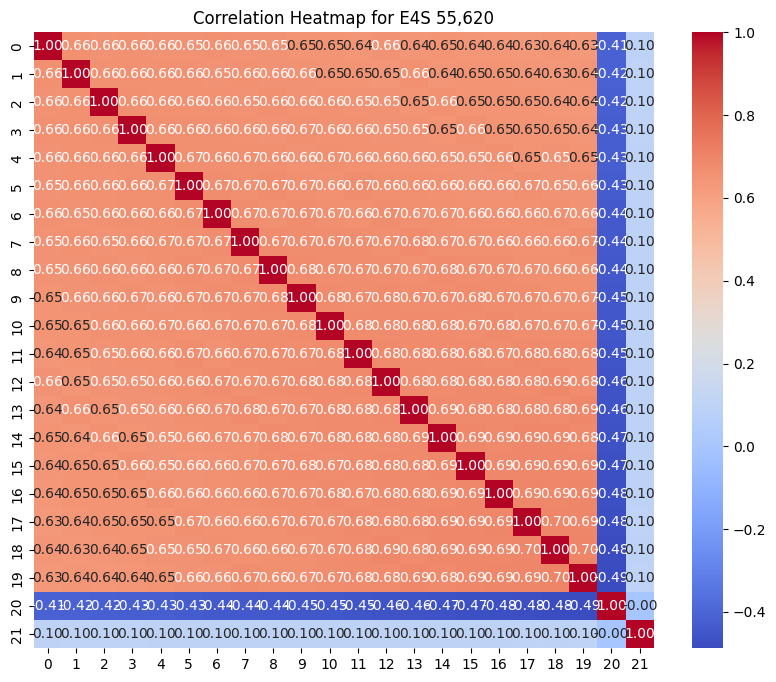

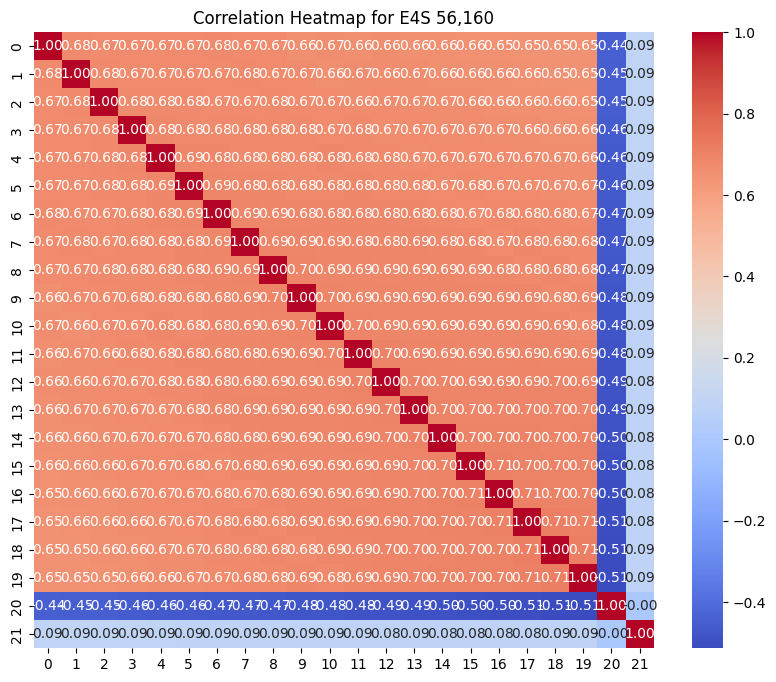

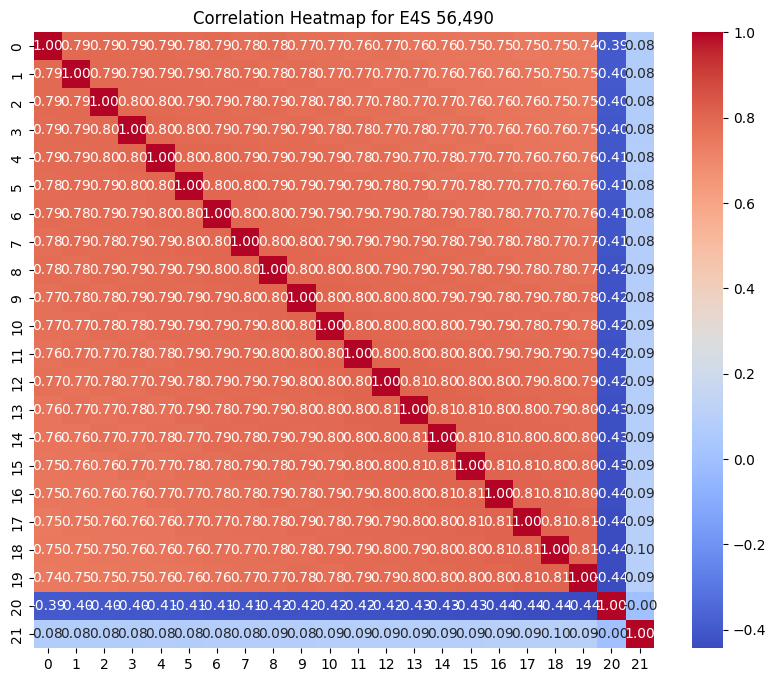

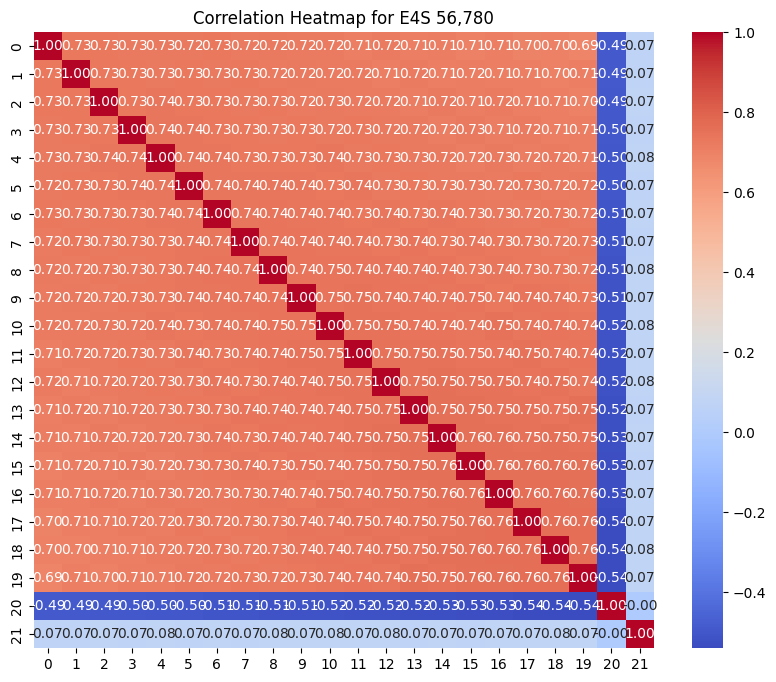

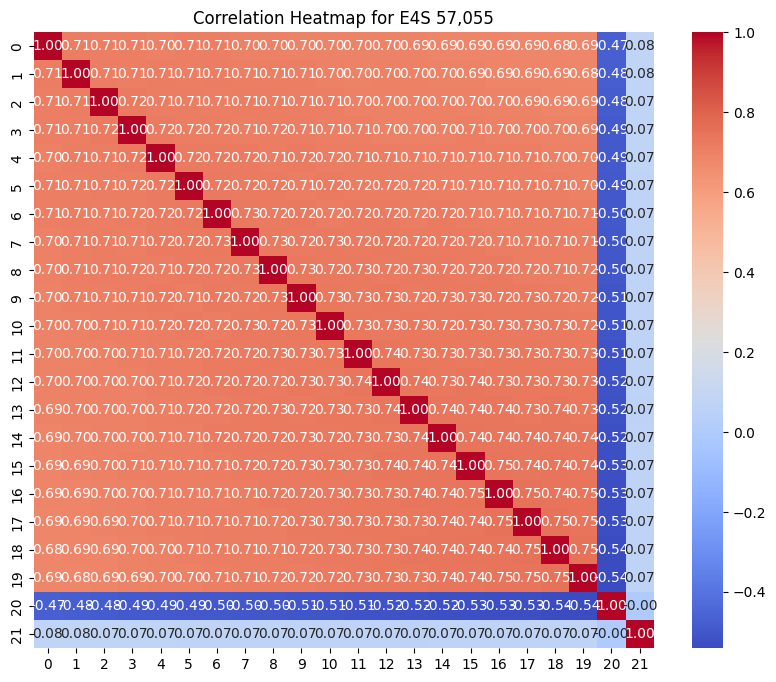

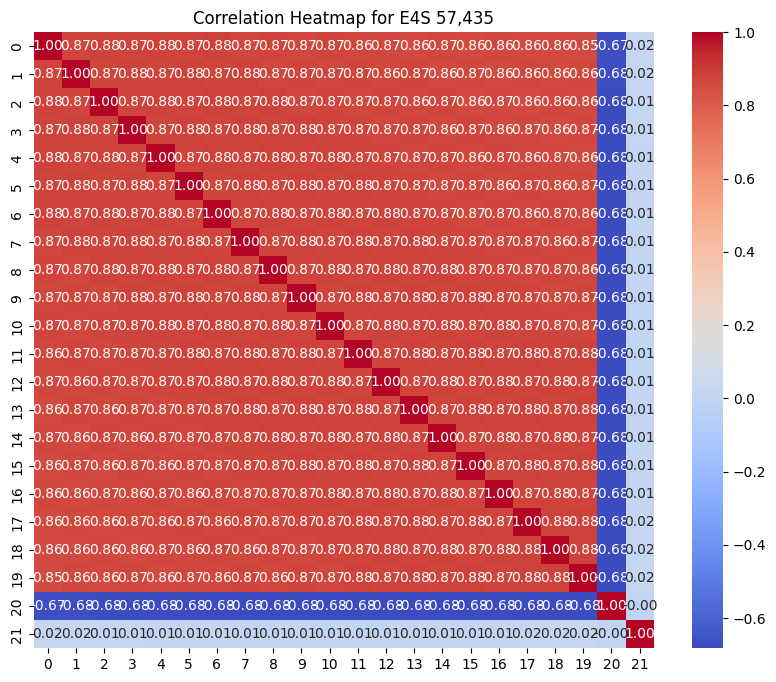

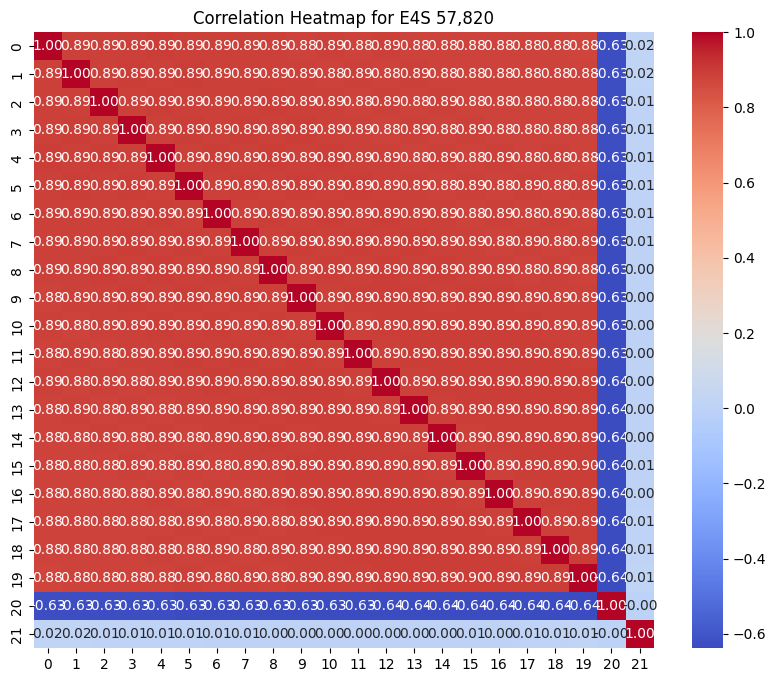

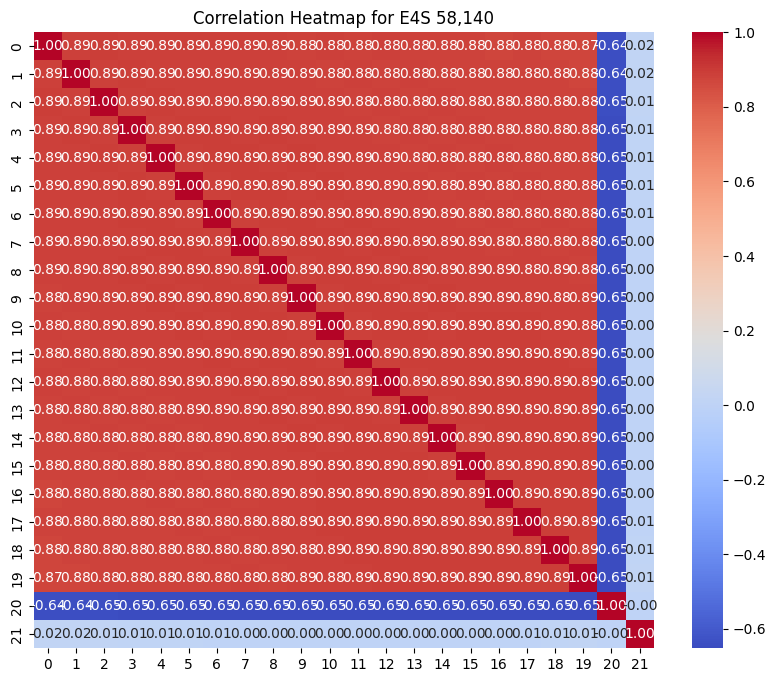

In [ ]:
#correlation plot of each minite
plot_correlation(train_df)

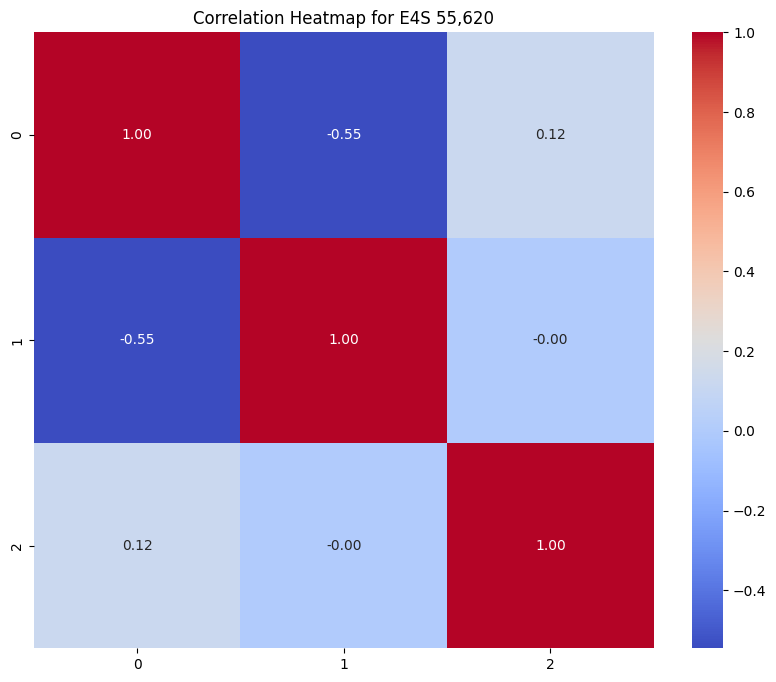

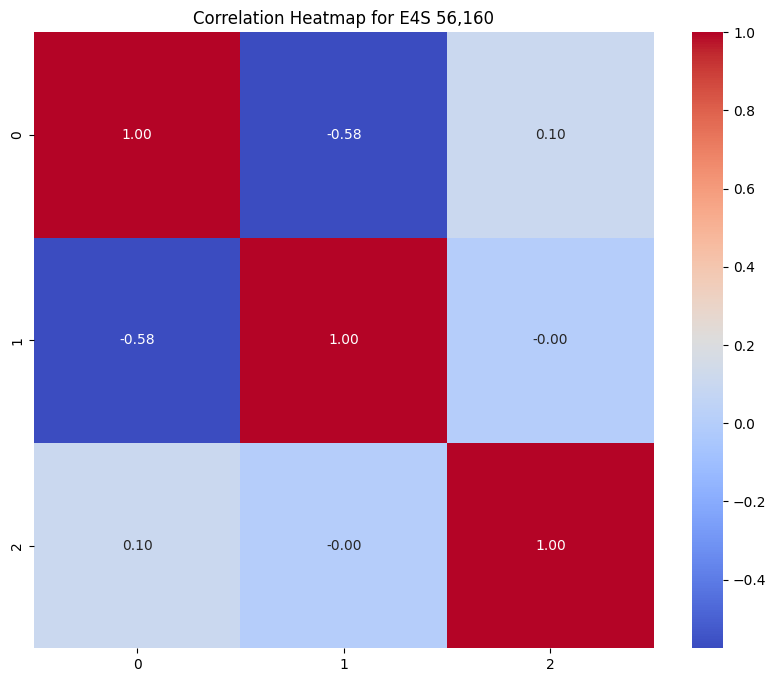

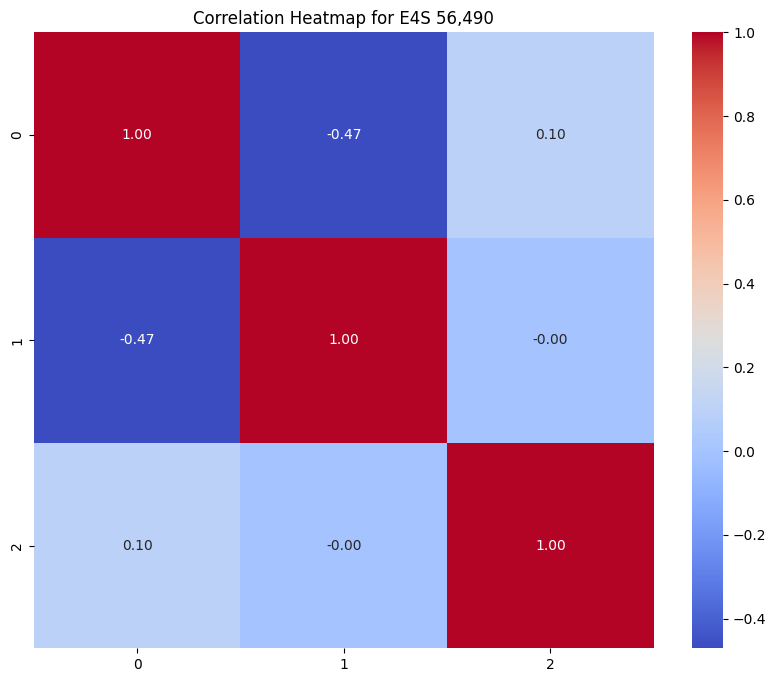

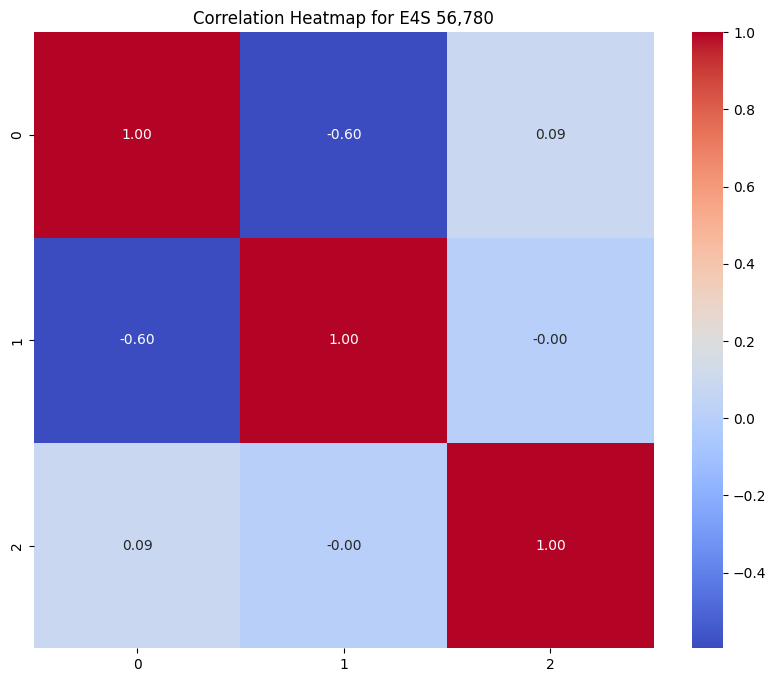

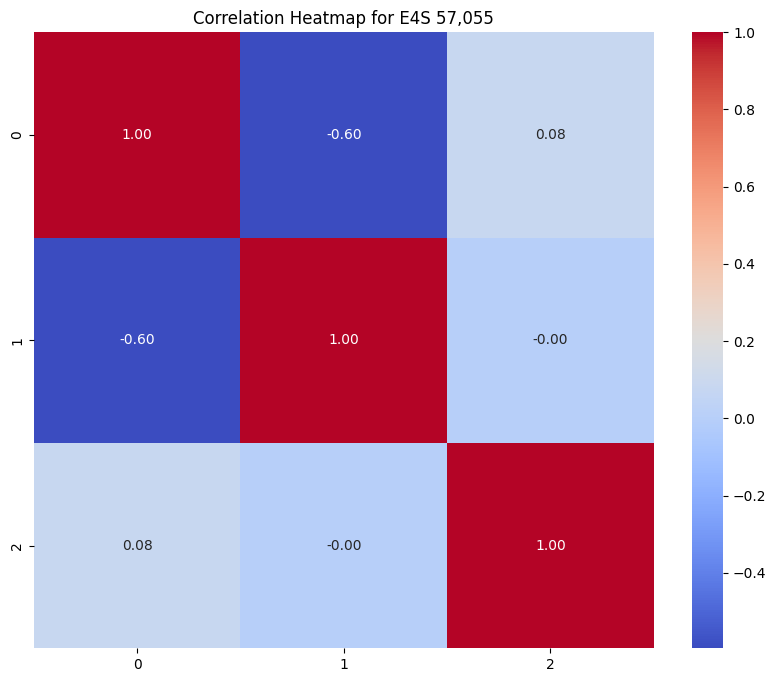

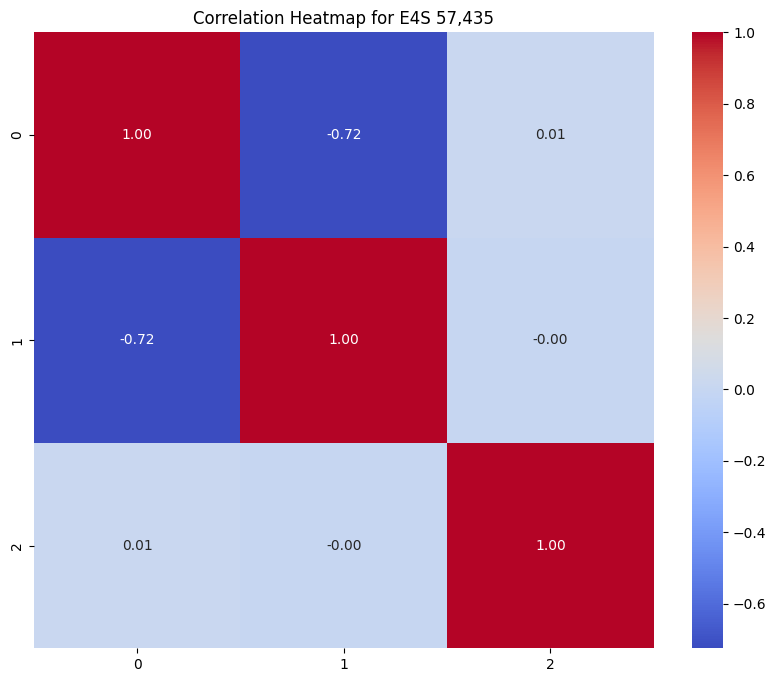

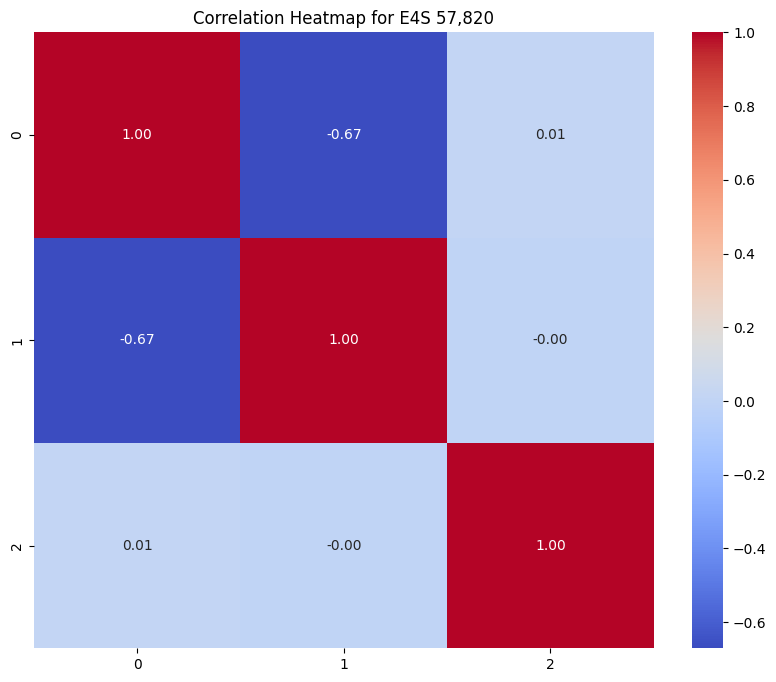

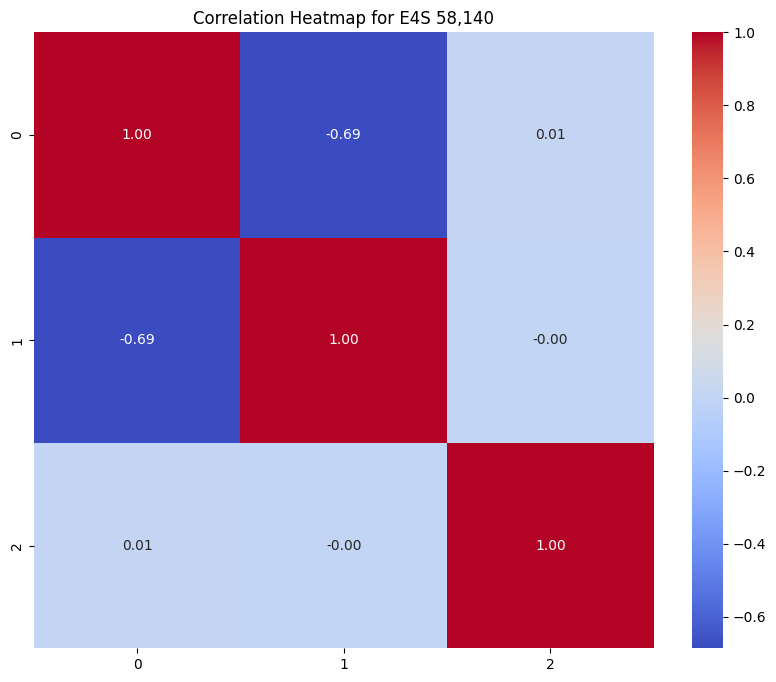

In [ ]:
#correlation plot of mean minites
plot_correlation(train_df_mean)

**Week 3: 2024-09-23 - 2024-09-29**
*   Xy function is used to split the data into X and y
*   plot_results is used to plot the results



In [ ]:
def plot_results(keys, mae_list, mse_list, r2_list):
  # Plot
  plt.figure(figsize=(10, 6))
  plt.plot(keys, mae_list, label='MAE', marker='o', color='b')
  plt.title('Mean Absolute Error (MAE) for Each Portal')
  plt.xlabel('Portal Key')
  plt.ylabel('MAE')
  plt.xticks(rotation=45)
  for i, txt in enumerate(mae_list):
      plt.text(i, mae_list[i], f'{txt:.4f}', ha='right', va='bottom')

  plt.tight_layout()
  plt.show()


  plt.figure(figsize=(10, 6))
  plt.plot(keys, mse_list, label='MSE', marker='o', color='g')
  plt.title('Mean Squared Error (MSE) for Each Portal')
  plt.xlabel('Portal Key')
  plt.ylabel('MSE')
  plt.xticks(rotation=45)
  for i, txt in enumerate(mse_list):
      plt.text(i, mse_list[i], f'{txt:.4f}', ha='right', va='bottom')

  plt.tight_layout()
  plt.show()


  plt.figure(figsize=(10, 6))
  plt.plot(keys, r2_list, label='R²', marker='o', color='r')
  plt.title('R² Score for Each Portal')
  plt.xlabel('Portal Key')
  plt.ylabel('R² Score')
  plt.xticks(rotation=45)

  for i, txt in enumerate(r2_list):
      plt.text(i, r2_list[i], f'{txt:.4f}', ha='right', va='bottom')

  plt.tight_layout()
  plt.show()

In [ ]:
import pandas as pd

def save_results_to_csv(keys, mae_list, mse_list, r2_list, filename="results.csv"):
    # Create a pandas DataFrame with the evaluation metrics
    results_df = pd.DataFrame({
        'Key': keys,
        'MAE': mae_list,
        'MSE': mse_list,
        'R²': r2_list
    })

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")


In [ ]:
#previ 20 mins' values and future 15 mins' value
def Xy(selected_data):
    X = []
    y = []
    numberofData = 20
    # Iterate through each day's data
    for day_data in selected_data:
        if len(day_data) < 16:  # Ensure there's enough data for the next 15 minutes
            continue

        for i in range(len(day_data) - 15):  # Ensure there's enough data for the next 15 minutes
            minute_data = day_data[i, 0:(numberofData)]  # Flow values from the previous 20 minutes
            day_of_week = day_data[i, (numberofData)]  # Day of week
            Interval_1 = day_data[i, (numberofData + 1)]  # Interval_1

            target_data = day_data[i + 1:i + 16, 0]  # Next 15 minutes of traffic flow

            # Filter out NaN data
            if np.all(~np.isnan(minute_data)) and np.all(~np.isnan(target_data)):
                # Include the new features in X: [minute_data + day_of_week]
                feature_vector = np.concatenate([minute_data, [day_of_week, Interval_1]])
                X.append(feature_vector)
                #!!!
                y.append(target_data)  # Mean of the next 15 minutes

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y


In [ ]:
#previ 20 mins' values and future 15 mins' mean value
def Xymean(selected_data):
    X = []
    y = []
    numberofData = 20
    # Iterate through each day's data
    for day_data in selected_data:
        if len(day_data) < 16:  # Ensure there's enough data for the next 15 minutes
            continue

        for i in range(len(day_data) - 15):  # Ensure there's enough data for the next 15 minutes
            minute_data = day_data[i, 0:(numberofData)]  # Flow values from the previous 20 minutes
            day_of_week = day_data[i, (numberofData)]  # Day of week
            Interval_1 = day_data[i, (numberofData + 1)]  # Interval_1

            target_data = day_data[i + 1:i + 16, 0]  # Next 15 minutes of traffic flow

            # Filter out NaN data
            if np.all(~np.isnan(minute_data)) and np.all(~np.isnan(target_data)):
                # Include the new features in X: [minute_data + day_of_week]
                feature_vector = np.concatenate([minute_data, [day_of_week, Interval_1]])
                X.append(feature_vector)
                #!!!
                y.append(np.mean(target_data))  # Mean of the next 15 minutes

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y


In [ ]:
#previ 20 mins' mean value and future 15 mins' mean value
def Xmeanymean(selected_data):
    X = []
    y = []
    numberofData = 1
    # Iterate through each day's data
    for day_data in selected_data:
        if len(day_data) < 16:  # Ensure there's enough data for the next 15 minutes
            continue

        for i in range(len(day_data) - 15):  # Ensure there's enough data for the next 15 minutes
            minute_data = day_data[i, 0:(numberofData)]  # Flow values from the previous 20 minutes
            day_of_week = day_data[i, (numberofData)]  # Day of week
            Interval_1 = day_data[i, (numberofData + 1)]  # Interval_1

            target_data = day_data[i + 1:i + 16, 0]  # Next 15 minutes of traffic flow

            # Filter out NaN data
            if np.all(~np.isnan(minute_data)) and np.all(~np.isnan(target_data)):
                # Include the new features in X: [minute_data + day_of_week]
                feature_vector = np.concatenate([minute_data, [day_of_week, Interval_1]])
                X.append(feature_vector)
                y.append(np.mean(target_data))  # Mean of the next 15 minutes

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y


In [ ]:
aaa = Xmeanymean(train_df["E4S 57,820"])
aaa[0].shape

(12871, 3)

In [ ]:
aaa = Xmeanymean(eva_df["E4S 57,820"])
aaa[0].shape

(3965, 3)

# Differet models
Feature used : 3 inputs

## Linear

X_train length: 12322, y_train length: 12322
key:E4S 55,620, X_train: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_train: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, X_test: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_test: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, y_pred: [49.80330454 49.3245548  48.5586704  ... 17.20483849 17.01322342
 17.01303146]
X_train length: 12261, y_train length: 12261
key:E4S 56,160, X_train: [[ 50.5    1.   450.  ]
 [ 49.85   1.   451.  ]
 [ 48.75   1.   452.  ]
 ...
 [ 14.15   4.   508.  ]
 [ 14.2    4.   509.  ]
 [ 14.4    4.   510.  ]]
key:E4S 56,160, y_train: [49.63       49.92333333 50.32333333 ... 15.5233333

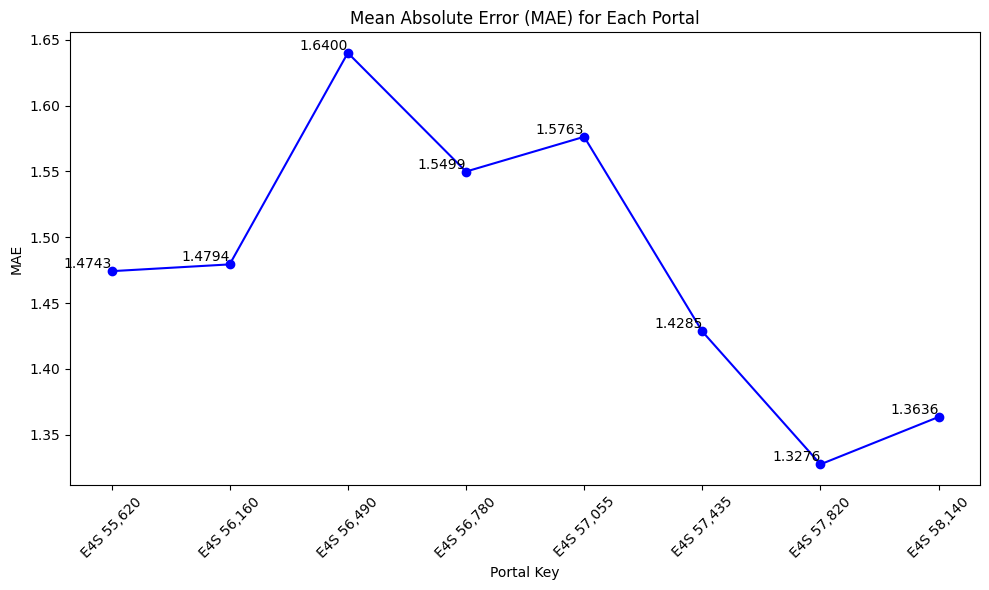

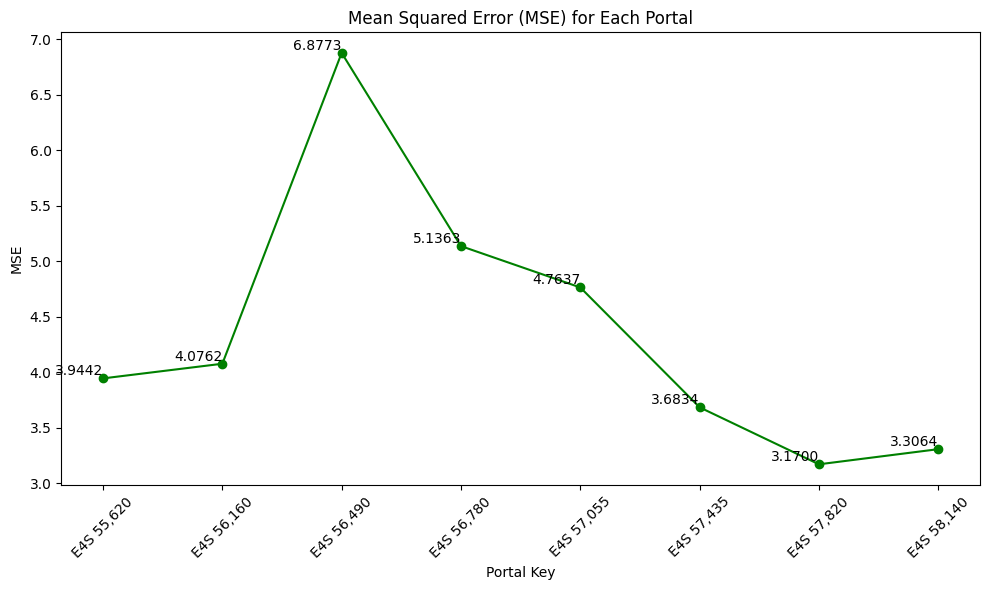

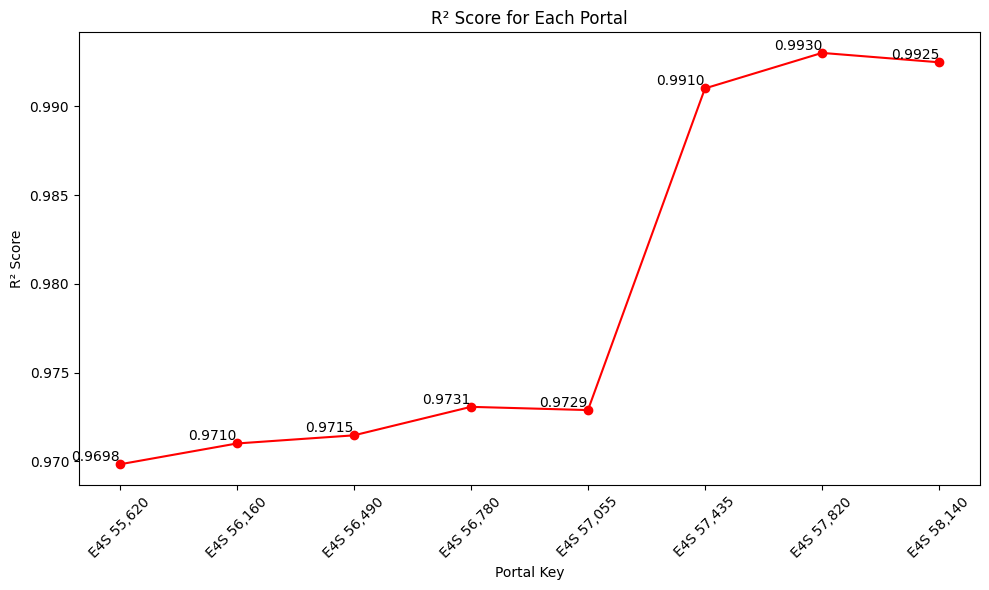

Results saved to Linear_evaluation_metrics.csv


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to store the results
keys = []
mae_list = []
mse_list = []
r2_list = []

for key in train_df:
    X_train, y_train = Xmeanymean(train_df_mean[key])
    X_test, y_test = Xmeanymean(train_df_mean[key])

    # Check if X_train and y_train lengths are consistent
    print(f"X_train length: {len(X_train)}, y_train length: {len(y_train)}")
    print(f"key:{key}, X_train: {X_train}")
    print(f"key:{key}, y_train: {y_train}")

    # Build the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print(f"key:{key}, X_test: {X_test}")
    print(f"key:{key}, y_test: {y_test}")
    print(f"key:{key}, y_pred: {y_pred}")

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the lists
    keys.append(key)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot results
plot_results(keys, mae_list, mse_list, r2_list)
# Call the function with your lists and specify the filename if needed
save_results_to_csv(keys, mae_list, mse_list, r2_list, "Linear_evaluation_metrics.csv")

## XGB

X_train length: 12322, y_train length: 12322
key:E4S 55,620, X_train: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_train: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, X_test: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_test: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, y_pred: [50.637733 51.86203  49.770096 ... 15.947973 15.964582 15.866159]
X_train length: 12261, y_train length: 12261
key:E4S 56,160, X_train: [[ 50.5    1.   450.  ]
 [ 49.85   1.   451.  ]
 [ 48.75   1.   452.  ]
 ...
 [ 14.15   4.   508.  ]
 [ 14.2    4.   509.  ]
 [ 14.4    4.   510.  ]]
key:E4S 56,160, y_train: [49.63       49.92333333 50.32333333 ... 15.52333333 15.65
 15.7

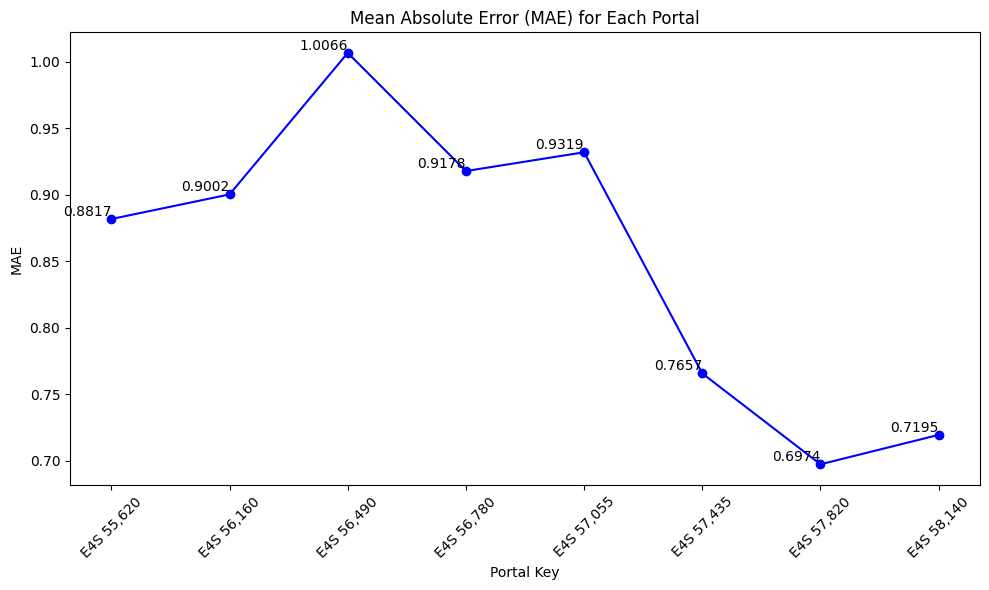

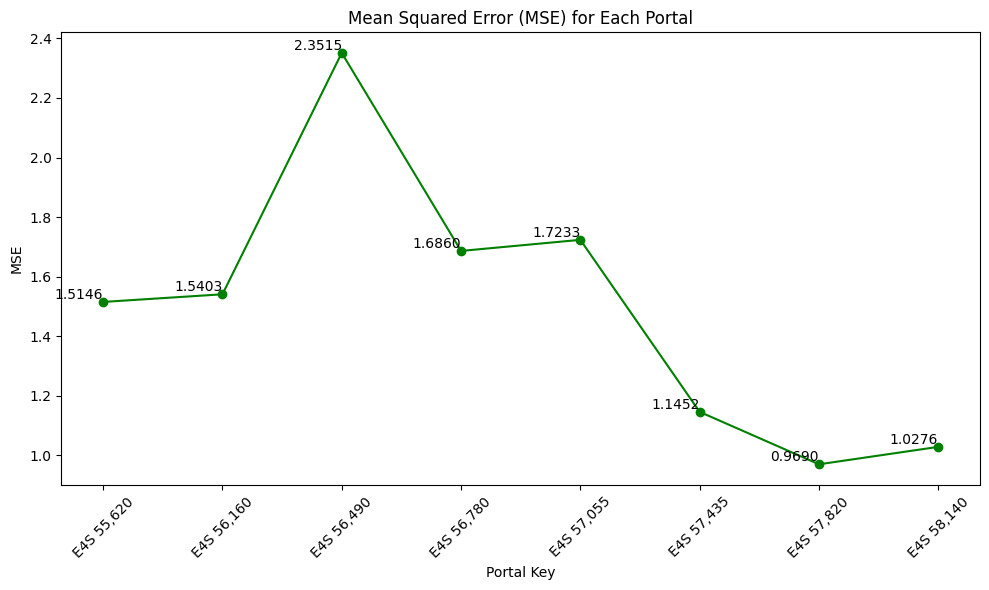

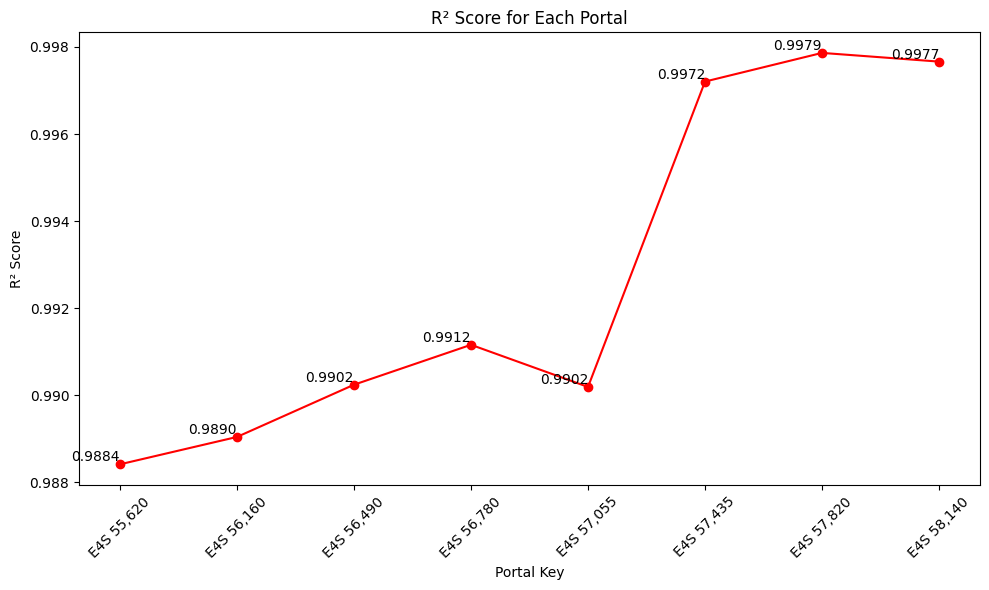

Results saved to XGB_evaluation_metrics.csv


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to store the results
keys = []
mae_list = []
mse_list = []
r2_list = []

for key in train_df:
    X_train, y_train = Xmeanymean(train_df_mean[key])
    X_test, y_test = Xmeanymean(train_df_mean[key])

    # Check if X_train and y_train lengths are consistent
    print(f"X_train length: {len(X_train)}, y_train length: {len(y_train)}")
    print(f"key:{key}, X_train: {X_train}")
    print(f"key:{key}, y_train: {y_train}")

    # Build the XGBoost regression model
    model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print(f"key:{key}, X_test: {X_test}")
    print(f"key:{key}, y_test: {y_test}")
    print(f"key:{key}, y_pred: {y_pred}")

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the lists
    keys.append(key)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot results
plot_results(keys, mae_list, mse_list, r2_list)
# Call the function with your lists and specify the filename if needed
save_results_to_csv(keys, mae_list, mse_list, r2_list, "XGB_evaluation_metrics.csv")

## LGB

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 12322, number of used features: 3
[LightGBM] [Info] Start training from score 48.009631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 12261, number of used features: 3
[LightGBM] [Info] Start training from score 48.158932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 12810, number of used features: 3
[LightGBM] [Info] Start trainin

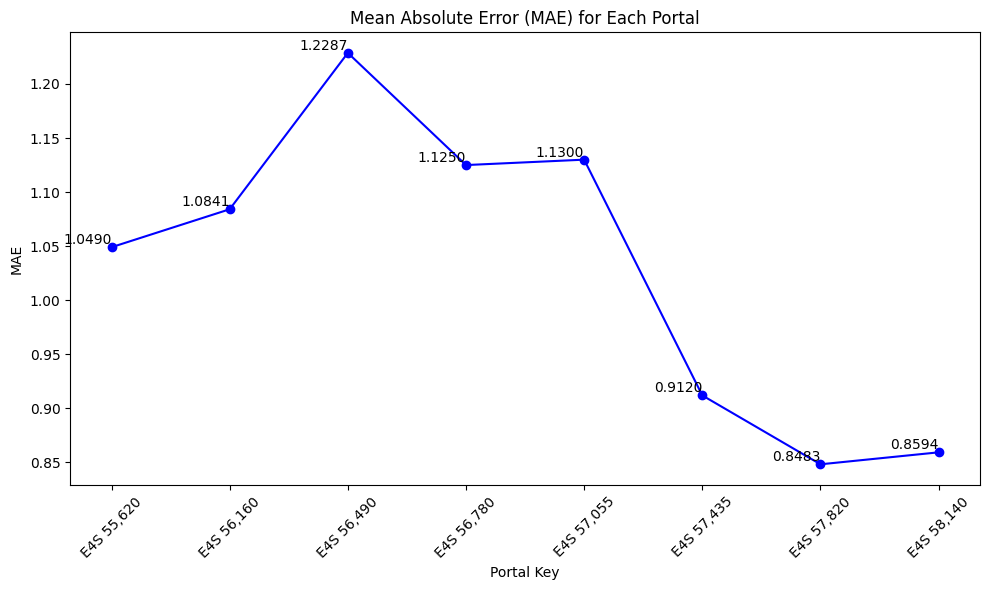

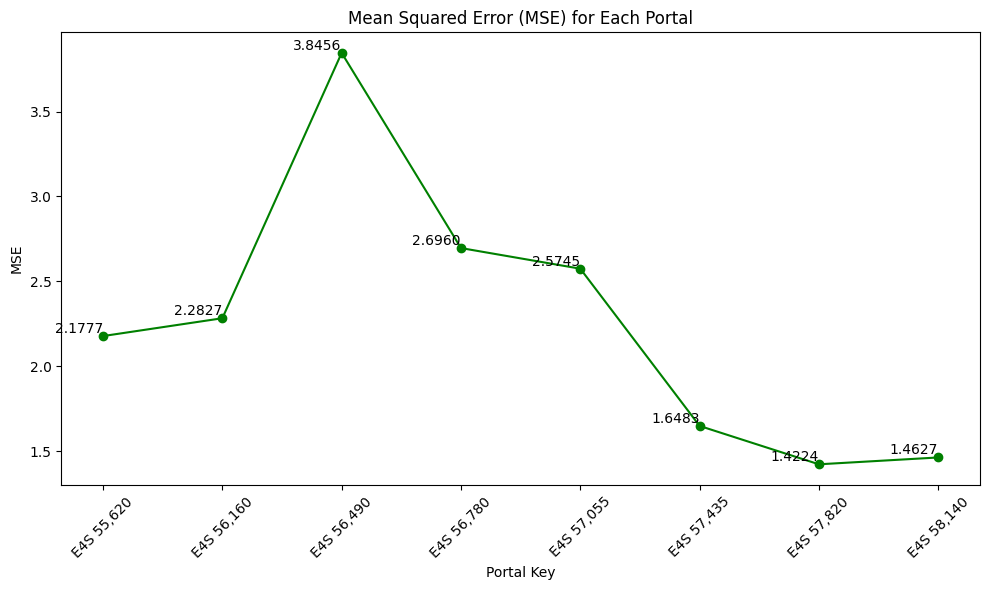

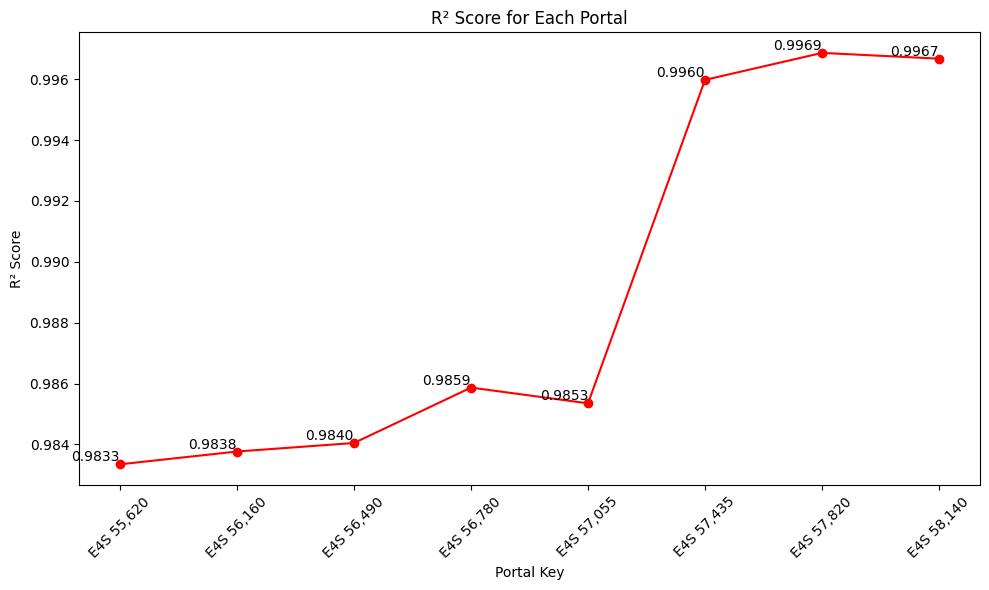

Results saved to LGB_evaluation_metrics.csv


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize lists to store the results
keys = []
mae_list = []
mse_list = []
r2_list = []

for key in train_df:
    X_train, y_train = Xmeanymean(train_df_mean[key])
    X_test, y_test = Xmeanymean(train_df_mean[key])

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the LightGBM regression model
    model = lgb.LGBMRegressor(n_estimators=100, random_state=42, objective='regression')
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the lists
    keys.append(key)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot results
plot_results(keys, mae_list, mse_list, r2_list)
# Call the function with your lists and specify the filename if needed
save_results_to_csv(keys, mae_list, mse_list, r2_list, "LGB_evaluation_metrics.csv")

## Randomforest tree

X_train length: 12322, y_train length: 12322
key:E4S 55,620, X_train: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_train: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, X_test: [[ 49.55   1.   450.  ]
 [ 49.05   1.   451.  ]
 [ 48.25   1.   452.  ]
 ...
 [ 15.05   4.   508.  ]
 [ 14.85   4.   509.  ]
 [ 14.85   4.   510.  ]]
key:E4S 55,620, y_test: [48.59333333 48.86       49.22666667 ... 15.92       16.02666667
 16.13666667]
key:E4S 55,620, y_pred: [49.27653333 49.64216667 50.17073333 ... 16.33256667 15.9958
 16.0508    ]
X_train length: 12261, y_train length: 12261
key:E4S 56,160, X_train: [[ 50.5    1.   450.  ]
 [ 49.85   1.   451.  ]
 [ 48.75   1.   452.  ]
 ...
 [ 14.15   4.   508.  ]
 [ 14.2    4.   509.  ]
 [ 14.4    4.   510.  ]]
key:E4S 56,160, y_train: [49.63       49.92333333 50.32333333 ... 15.52333333 15

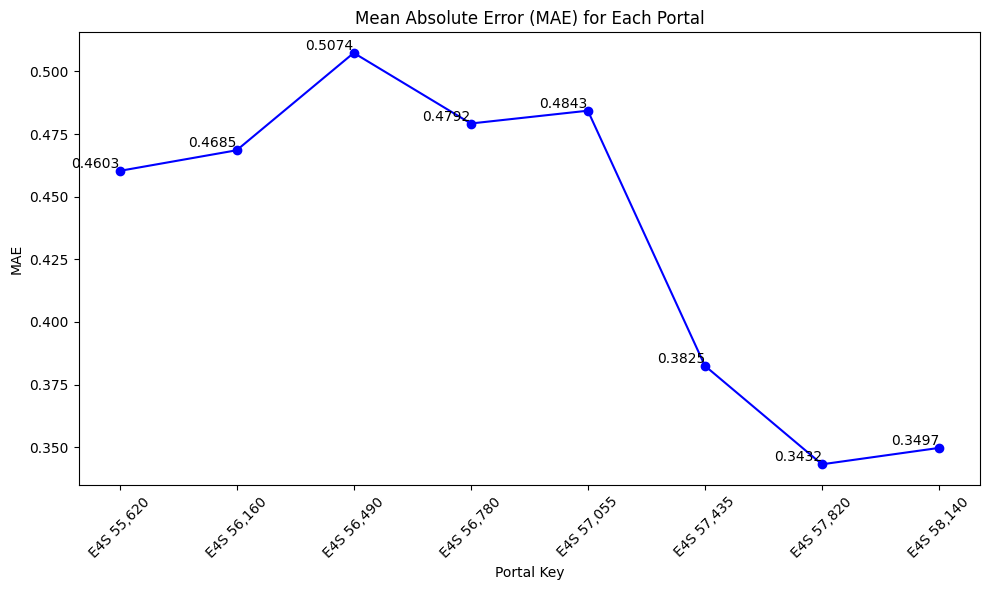

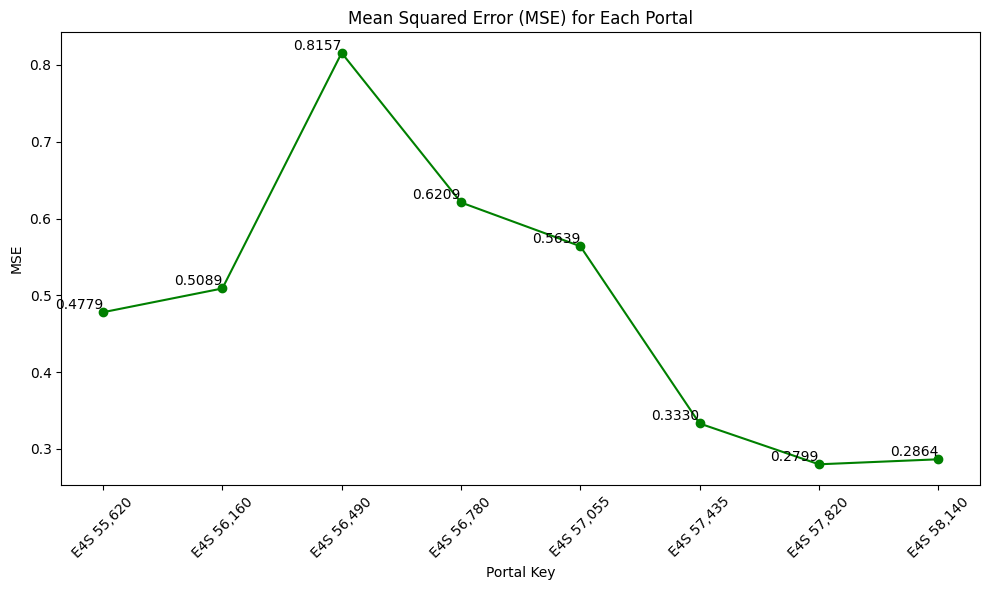

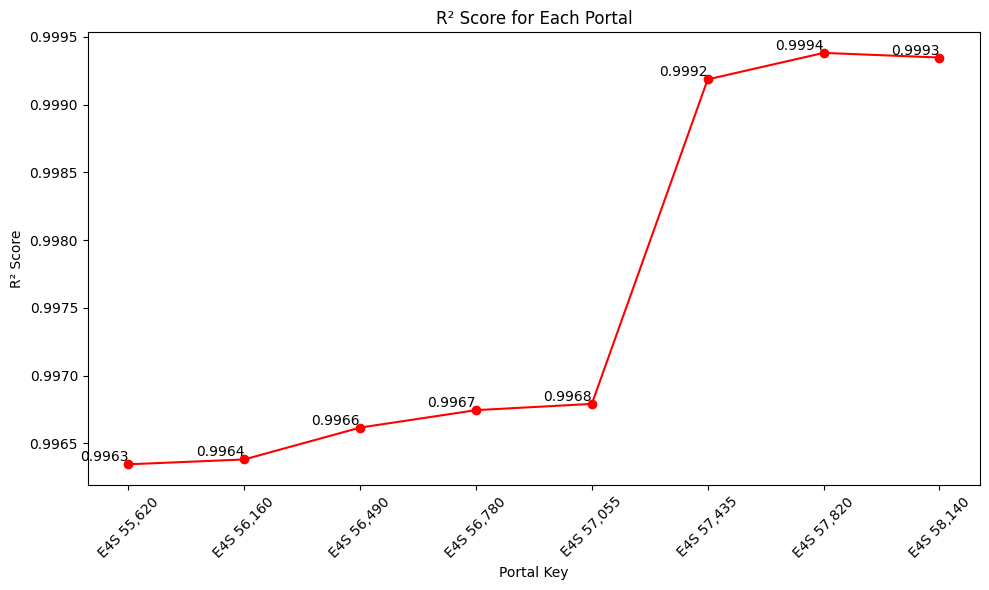

Results saved to Randomtree_evaluation_metrics.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store the results
keys = []
mae_list = []
mse_list = []
r2_list = []

for key in train_df:
    X_train, y_train = Xmeanymean(train_df_mean[key])
    X_test, y_test = Xmeanymean(train_df_mean[key])

    # Check if X_train and y_train lengths are consistent
    print(f"X_train length: {len(X_train)}, y_train length: {len(y_train)}")
    print(f"key:{key}, X_train: {X_train}")
    print(f"key:{key}, y_train: {y_train}")


    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print(f"key:{key}, X_test: {X_test}")
    print(f"key:{key}, y_test: {y_test}")
    print(f"key:{key}, y_pred: {y_pred}")

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the lists
    keys.append(key)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot results
plot_results(keys, mae_list, mse_list, r2_list)
# Call the function with your lists and specify the filename if needed
save_results_to_csv(keys, mae_list, mse_list, r2_list, "Randomtree_evaluation_metrics.csv")

## NN: LSTM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def XymeanLSTM(selected_data):
    X = []
    y = []
    num_previous_minutes = 20  # Number of previous minutes for input features
    time_steps = 1  # Time step length for LSTM (in this case, we use 1)

    # Iterate through each day's data
    for day_data in selected_data:
        if len(day_data) < 16:  # Ensure there's enough data for the next 15 minutes
            continue

        for i in range(len(day_data) - 15):  # Ensure there's enough data for the next 15 minutes
            minute_data = day_data[i, 0:num_previous_minutes]  # Flow values from the previous 20 minutes
            day_of_week = day_data[i, num_previous_minutes]  # Day of week
            DP_ID = day_data[i, num_previous_minutes + 1]  # DP_ID
            Interval_1 = day_data[i, num_previous_minutes + 2]  # Interval_1

            target_data = day_data[i + 1:i + 16, 0]  # Next 15 minutes of traffic flow

            # Filter out NaN data
            if np.all(~np.isnan(minute_data)) and np.all(~np.isnan(target_data)):
                # Include the new features in X: [minute_data + day_of_week]
                feature_vector = np.concatenate([minute_data, [day_of_week, DP_ID, Interval_1]])
                X.append(feature_vector)  # Append without reshaping

                # Mean of the next 15 minutes
                y.append(np.mean(target_data))

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)


    return X, y


Epoch [10/300], Loss: 4.5654
Epoch [20/300], Loss: 1.0803
Epoch [30/300], Loss: 3.8407
Epoch [40/300], Loss: 3.4651
Epoch [50/300], Loss: 0.4607
Epoch [60/300], Loss: 9.5994
Epoch [70/300], Loss: 1.1030
Epoch [80/300], Loss: 2.3048
Epoch [90/300], Loss: 2.0529
Epoch [100/300], Loss: 1.9509
Epoch [110/300], Loss: 1.6727
Epoch [120/300], Loss: 2.0478
Epoch [130/300], Loss: 4.1752
Epoch [140/300], Loss: 5.1798
Epoch [150/300], Loss: 2.4614
Epoch [160/300], Loss: 2.4366
Epoch [170/300], Loss: 0.5520
Epoch [180/300], Loss: 3.0811
Epoch [190/300], Loss: 0.4514
Epoch [200/300], Loss: 0.5114
Epoch [210/300], Loss: 0.2630
Epoch [220/300], Loss: 1.9333
Epoch [230/300], Loss: 4.4480
Epoch [240/300], Loss: 1.7386
Epoch [250/300], Loss: 0.4801
Epoch [260/300], Loss: 0.2834
Epoch [270/300], Loss: 3.1453
Epoch [280/300], Loss: 0.6757
Epoch [290/300], Loss: 2.2960
Epoch [300/300], Loss: 3.8098
0.9780640567517705
Epoch [10/300], Loss: 3.6177
Epoch [20/300], Loss: 2.0161
Epoch [30/300], Loss: 0.7065
Epo

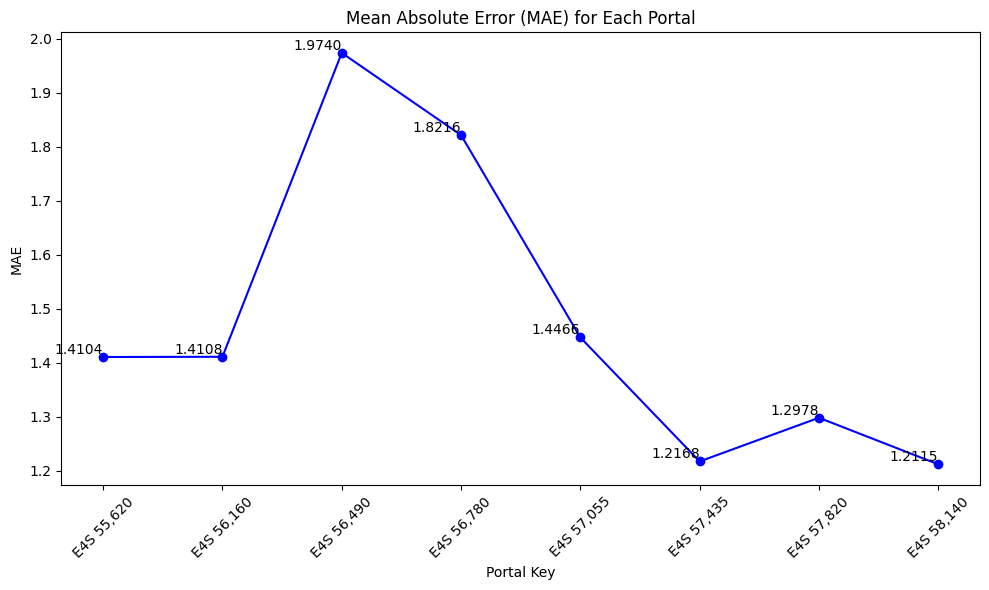

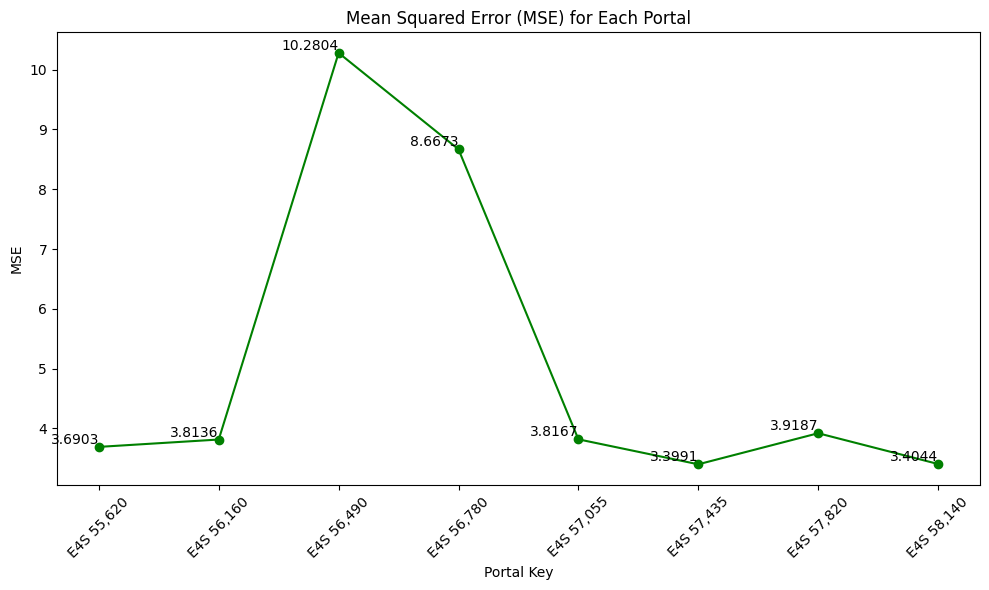

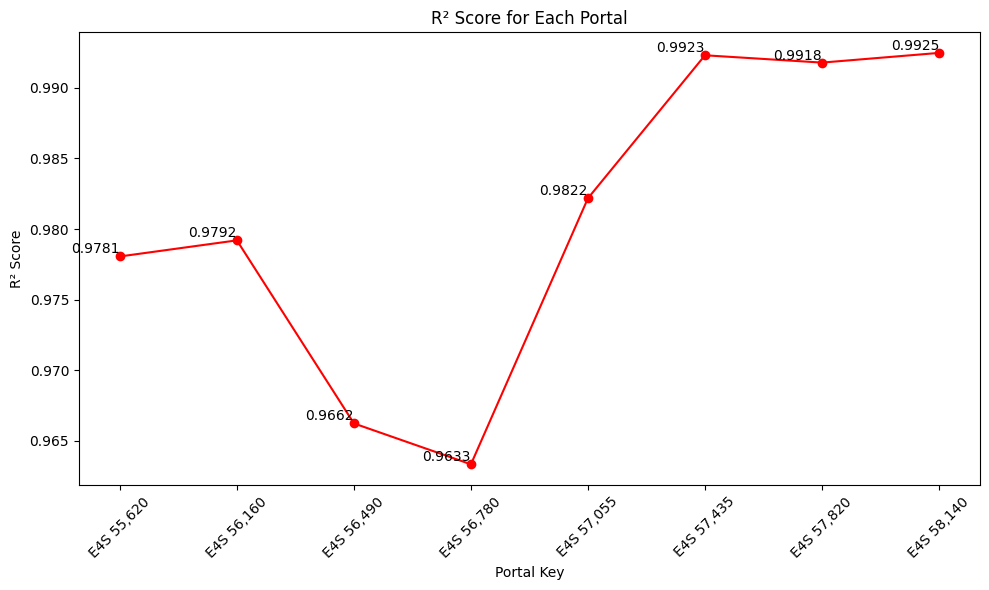

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Initialize hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Initialize cell state

        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Get the output from the last time step
        return out

# Initialize lists to store results
keys = []
mae_list = []
mse_list = []
r2_list = []

# Hyperparameters
input_size = 3  # Input feature dimension (20 minutes of traffic + DayOfWeek, DP_ID, Interval_1)
hidden_size = 64  # Number of hidden units in LSTM
num_layers = 2  # Number of LSTM layers
output_size = 1  # Output dimension (average traffic flow for the next 15 minutes)
num_epochs = 300  # Number of training epochs
batch_size = 32  # Batch size
learning_rate = 0.001  # Learning rate

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate through each key
for key in train_df:
    # Get training and testing data
    X_train, y_train = Xmeanymean(train_df[key])
    X_test, y_test = Xmeanymean(eva_df[key])

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1).to(device)  # Add a dimension for time steps
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    # Create data loader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize LSTM model
    model = LSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the LSTM model
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Print loss every 10 epochs
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluation phase
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).cpu().numpy().squeeze()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(r2)

    # Store results
    keys.append(key)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Final results
plot_results(keys, mae_list, mse_list, r2_list)


**Week 4: 2024-09-30 - 2024-10-05**
*   Project slide for presentation

**Week 5: 2024-10-06 - 2024-10-12**
*   Presentation
*   Project written report

The report could be edited and viewed via the link here with Overleaf.



**Key dates**
*   **8 Oct.: slide submission**
*   **9 Oct.: Presentation**
*   **18 Oct.: report submission**

